In [1]:
import cv2 as cv
import os
import re
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_url = '../art'

In [3]:
traditional_dict = {
    os.path.splitext(filename)[0].replace('_', ' ').title(): filename
    for filename in os.listdir('{}/traditional'.format(base_url))
}

modern_dict = {
    os.path.splitext(filename)[0].replace('_', ' ').title(): filename
    for filename in os.listdir('{}/modern'.format(base_url))
}

contemporary_dict = {
    os.path.splitext(filename)[0].replace('_', ' ').title(): filename
    for filename in os.listdir('{}/contemporary'.format(base_url))
}

categories = {
    "traditional": traditional_dict,
    "modern": modern_dict,
    "contemporary": contemporary_dict,
}

In [4]:
def get_category():
    user_input = input("Please enter preferred category and we'll pick one at random for you: ").lower()
    if user_input not in categories:
        return False, 'Invalid category'
    return True, '{}/{}/{}'.format(base_url,user_input, random.choice(list(categories[user_input].values())))

In [5]:
def show_img(index, title, img):
    plt.subplot(1,2,index)
    plt.title(title)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [6]:
def sobel(img):
    sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
    return  np.uint8(cv.magnitude(sobel_x, sobel_y))

def prewitt_edges(img):
    kernel_x = np.array([
        [-1, -1, -1],
        [0, 0, 0], 
        [1, 1, 1],
    ])
    kernel_y = np.transpose(kernel_x)
    prewitt_x = cv.filter2D(img, -1, kernel_x)
    prewitt_y = cv.filter2D(img, -1, kernel_y)

    return  np.uint8(np.sqrt(
        np.square(prewitt_x) + np.square(prewitt_y)
    ))

def robert_edges(img):
    image = cv.GaussianBlur(img, (5, 5), 0)
    kernel_x = np.array([
        [1, 0], [0, -1]
    ])
    kernel_y = np.rot90(kernel_x).transpose()

    robert_x = cv.filter2D(image, -1, kernel_x)
    robert_y = cv.filter2D(image, -1, kernel_y)

    return  np.uint8(np.sqrt(
        np.square(robert_x) + np.square(robert_y)
    ))

def laplacian(img):
    laplacian = cv.Laplacian(img, cv.CV_64F)
    return cv.convertScaleAbs(laplacian)

def canny(img):
    return cv.Canny(img, 100, 200)

In [7]:
edge_detection = {
    'sobel': sobel,
    'prewitt_edges': prewitt_edges,
    'robert_edges': robert_edges,
    'laplacian': laplacian,
    'canny': canny
}

In [8]:
def list_available_edge_detection_operations(img):
    print('The available operations are: {}'.format(', '.join(edge_detection.keys())))
    user_input = input("Please enter preferred operation: ").lower()
    if user_input not in edge_detection:
        print('Invalid operator')
    else:
        new_img = edge_detection[user_input](img)
        show_img(2, '{}'.format(user_input.title()), new_img)

Hello there, the available categories are: traditional, modern, contemporary
The available operations are: sobel, prewitt_edges, robert_edges, laplacian, canny


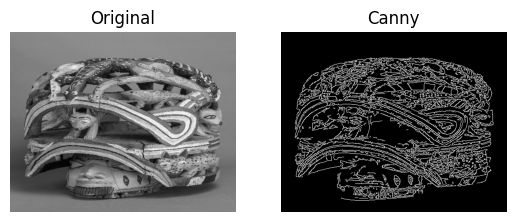

In [12]:
print('Hello there, the available categories are: {}'.format(', '.join(categories.keys())))
state, result = get_category()
if not state:
    print(result)
else:
    image = cv.imread(result, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (500, 400))
    show_img(1, 'Original', image)
    
    list_available_edge_detection_operations(image)
    plt.show()